                subreddit  number_of_comments
0   AcrossTheSpider_Verse                7706
1            DC_Cinematic               76153
2              Filmmakers               10658
3             ForrestGump                 249
4               Godfather                4478
5         IMDbFilmGeneral                6749
6               Inception                2420
7      IntoTheSpiderverse               10858
8               JamesBond               33747
9                  Marvel               24723
10       MovieSuggestions               40403
11                  Pixar               10837
12    ShawshankRedemption                 118
13      SilenceOfTheLambs                 239
14           SpiritedAway                1867
15               StarWars               47182
16     TheDarkKnightRises                7019
17   TheDarkKnightTrilogy                 236
18         TheGodfatherII                   2
19      TheLordOfTheRings                 130
20               TrueFilm         

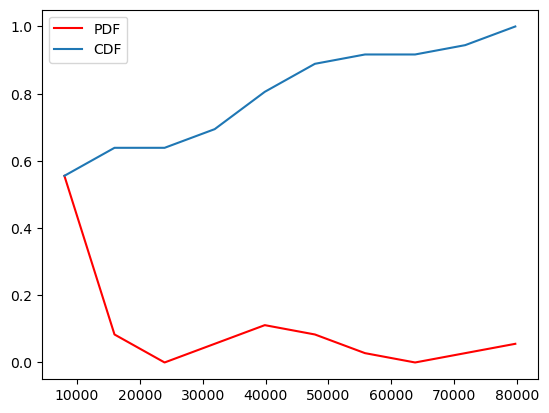

In [9]:
import datetime as dt
from datetime import datetime, timedelta
import json
import pandas as pd
import pymongo
from pymongo import MongoClient
from pandas.io.json import json_normalize
import math
from numpy import nan
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


with open('config.json', 'r') as file:
    config_data = json.load(file)

mongo_hostname = config_data['MONGO_HOSTNAME']
mongo_portnumber = config_data['MONGO_PORTNUMBER']


mongo_client = pymongo.MongoClient(mongo_hostname, mongo_portnumber)
db = mongo_client['movieData']

politics_collection = db['reddit']


data = politics_collection.find({'number_of_comments': {'$exists': True}})



df = pd.DataFrame(data)


subreddit_comments = df.groupby('subreddit')['number_of_comments'].sum().reset_index()

print(subreddit_comments)

list_of_comments=subreddit_comments["number_of_comments"].tolist()
print(list_of_comments)

N = len(list_of_comments)
  

data = list_of_comments 
print(data)  
# getting data of the histogram
count, bins_count = np.histogram(data)
  

pdf = count / sum(count)
  

cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()